In [71]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tf_util.systems import system_from_str
from train_dsn import train_dsn
import seaborn as sns
import pandas as pd



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1A
1A
1A
1A
1A


/Users/sbittner/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1A
1A
1A
1A


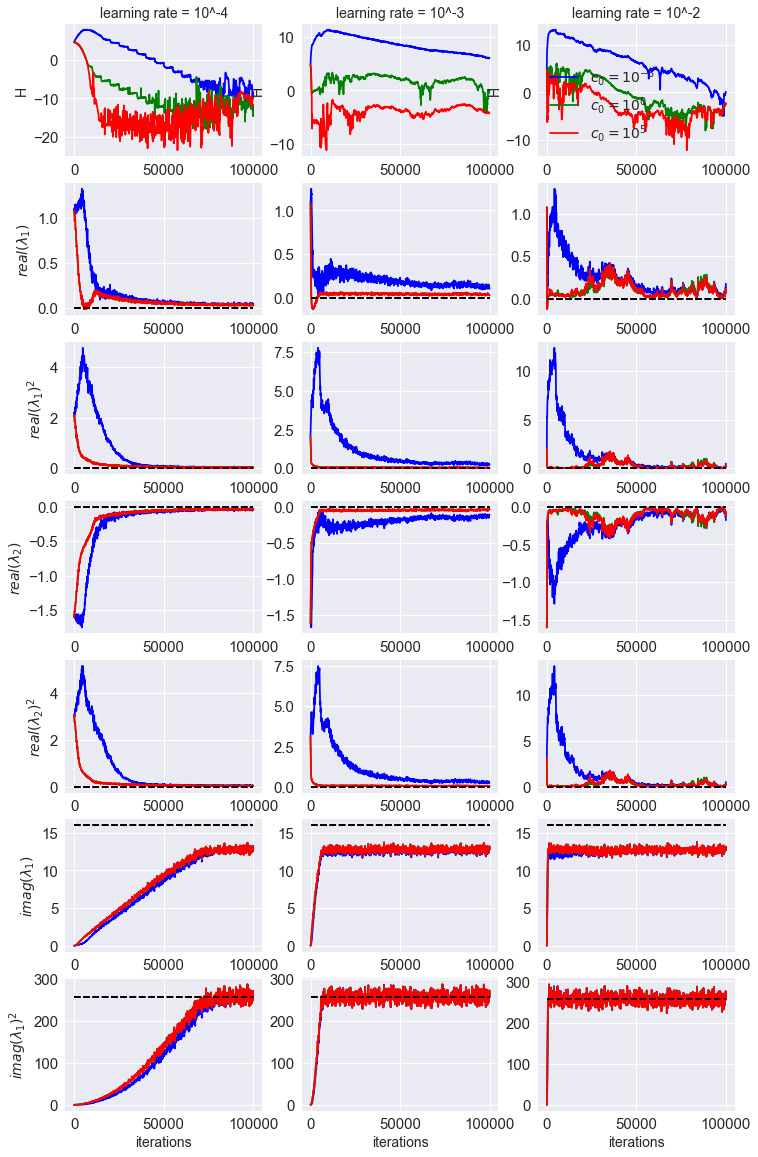

2P
2P
2P
2P
2P
2P
2P
2P
2P


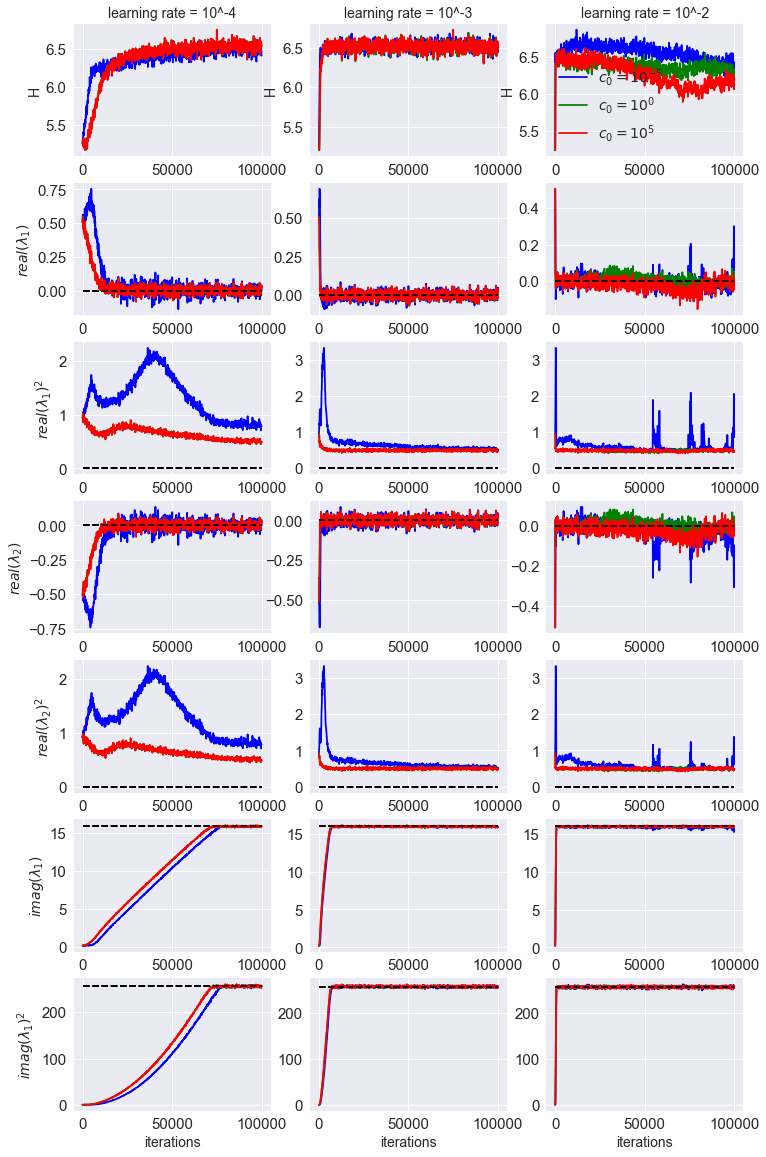

4P
4P
4P
4P
4P
4P
4P
4P
4P


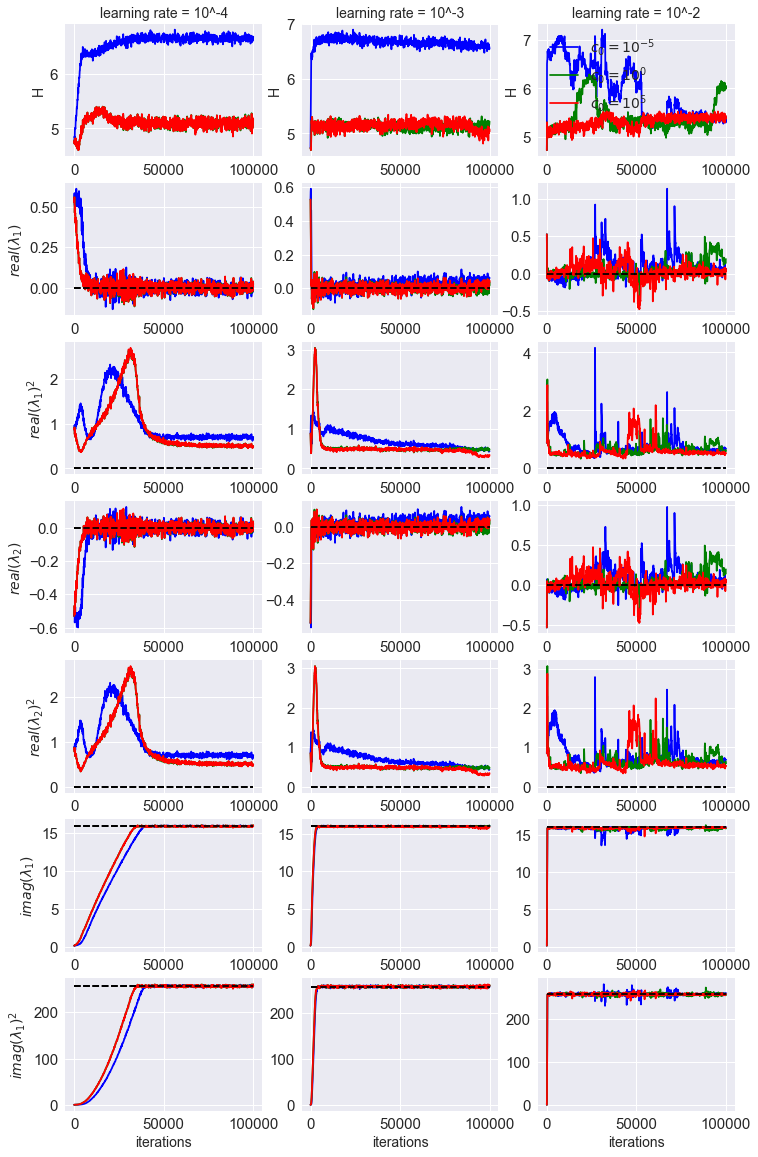

8P
8P
8P
8P
8P
8P
8P
8P
8P


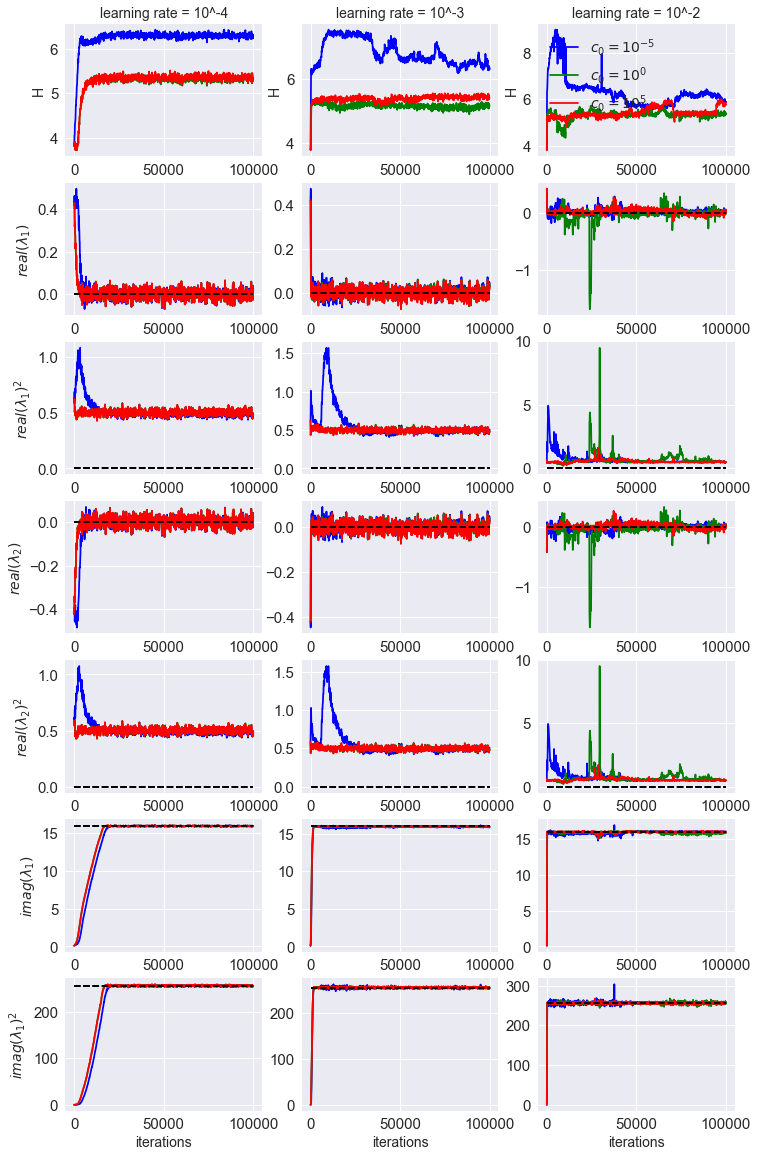

10P
10P
10P
10P
10P
10P
10P
10P
10P


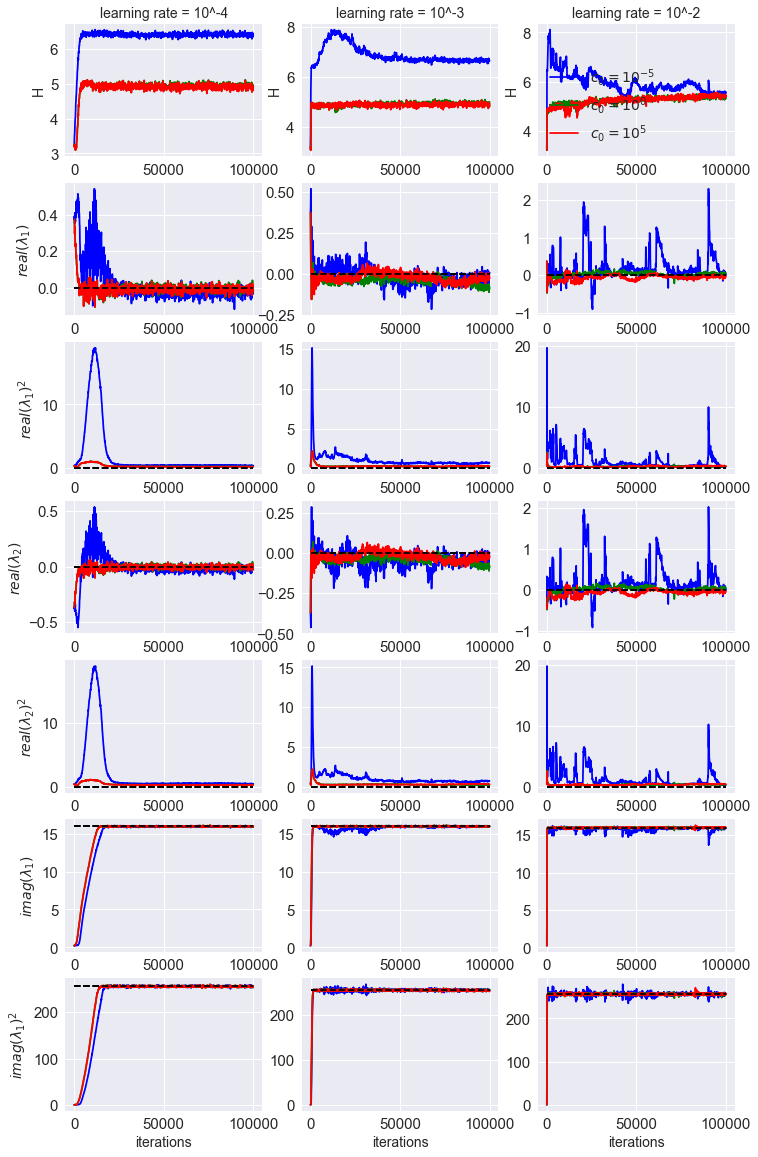

In [85]:
fontsize = 14;
opt_type = 'learnA';
resdir = '/Users/sbittner/Documents/dsn/notebooks/results/%s/' % opt_type;

flow_strings = ['1A', '2P', '4P', '8P', '10P'];
num_flow_strings = len(flow_strings);
lr_orders = [-4, -3, -2];
num_lr_orders = len(lr_orders);
colors = ['b', 'g', 'r'];

c_init_orders = [-5,0,5];
num_c_init_orders = len(c_init_orders);

constraint_names = [r'$real(\lambda_1)$ ', r'$real(\lambda_1)^2$', \
                    r'$real(\lambda_2)$', r'$real(\lambda_2)^2$', \
                    r'$imag(\lambda_1)$', r'$imag(\lambda_1)^2$'];

legendstrs = [(r'$c_0 = 10^{%d}$' % i) for i in c_init_orders];
for i in range(num_flow_strings):
    flow_string = flow_strings[i];
    plt.figure(figsize=(12,20));
    for j in range(num_lr_orders):
        lr_order = lr_orders[j];
        for k in range(num_c_init_orders):
            c_init_order = c_init_orders[k];
            print(flow_string);
            fname = resdir + 'linear_2D_D=4_T=1_flow=%s_lr_order=%d_c=%d_rs=0/results.npz' % (flow_string, lr_order, c_init_order);
            npzfile = np.load(fname);

            check_rate = npzfile['check_rate'];
            Hs = npzfile['Hs'];
            T_xs = npzfile['T_xs'];
            mu = npzfile['mu'];
            nits = costs.shape[0];
            iterations = np.arange(0, check_rate*nits, check_rate);
            
            plt.subplot(7,3,j+1);
            plt.plot(iterations, Hs, c=colors[k]);
            plt.ylabel('H', fontsize=fontsize);
            if (k==0):
                plt.title('learning rate = 10^%d' % lr_order, fontsize=fontsize);
            if (j==2 and k==(num_c_init_orders-1)):
                plt.legend(legendstrs, fontsize=fontsize);
                
            for ii in range(6):
                plt.subplot(7,3,3*(ii+1)+j+1);
                plt.plot(iterations, T_xs[:,ii], c=colors[k]);
                plt.plot([iterations[0], iterations[-1]], [mu[ii], mu[ii]], 'k--');
            
            if (j==0 and k==0):
                for ii in range(6):
                    plt.subplot(7,3,3*(ii+1)+j+1);
                    plt.ylabel(constraint_names[ii], fontsize=fontsize);
        plt.xlabel('iterations', fontsize=fontsize);
    plt.savefig('%s_%s.pdf' % (opt_type, flow_string));
    plt.show();
    


(20, 1000, 4)
(20, 1000)


<Figure size 432x288 with 0 Axes>

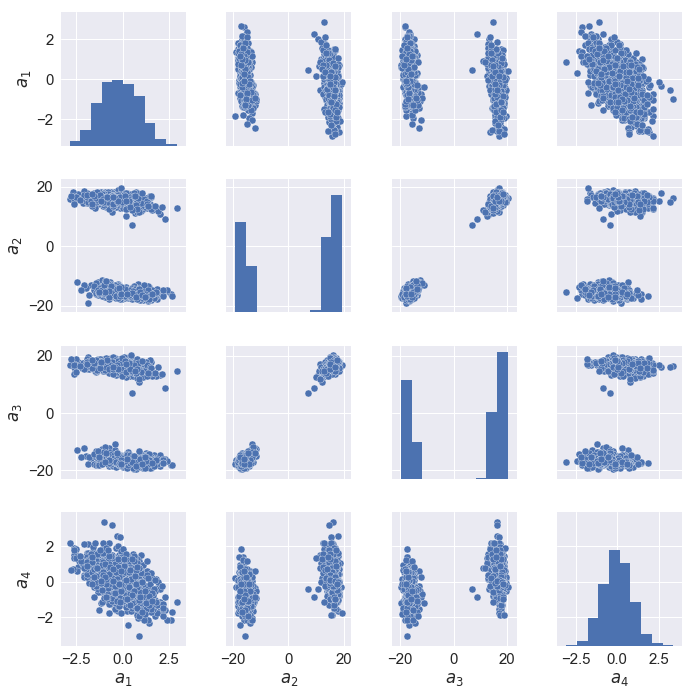

In [86]:
# plot best model
flow_string = '10P';
lr_order = -3;
c_init_order = -0;

fname = resdir + 'linear_2D_D=4_T=1_flow=%s_lr_order=%d_c=%d_rs=0/results.npz' % (flow_string, lr_order, c_init_order);
npzfile = np.load(fname);

phis = npzfile['phis'];
log_q_xs = npzfile['log_q_xs'];

print(phis.shape);
print(log_q_xs.shape);

phi = phis[-1];
log_q_x = log_q_xs[-1];

if (opt_type == 'learnW'):
    columns = [r'$w_%d$' % i for i in range(1,5)];
else:
    columns = [r'$a_%d$' % i for i in range(1,5)];
plt.figure();
data = pd.DataFrame(phi, columns=columns);
sns.set(font_scale=1.5)
sns.pairplot(data);
plt.show();

